In [69]:
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

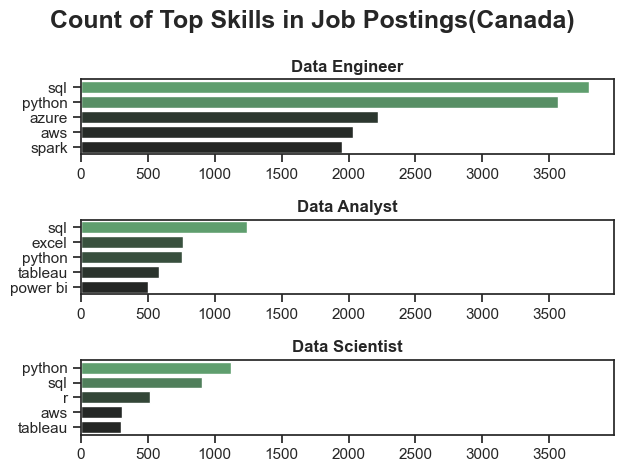

In [161]:
country = 'Canada'
df_CA = df[df['job_country'] == country].copy()
df_CA_explode= df_CA.explode('job_skills')
df_CA_groupby = df_CA_explode.groupby(['job_skills','job_title_short']).agg('size').reset_index(name= 'value counts')
df_CA_groupby.sort_values('value counts', ascending=False, inplace= True)
job_titles = df_CA_groupby['job_title_short'].unique().tolist()
job_titles = job_titles[ : 2] + job_titles[3:4]

df_CA_job  = df_CA['job_title_short'].value_counts().reset_index(name = 'jobs total')
df_merged = pd.merge(df_CA_groupby, df_CA_job, how= 'left', on = 'job_title_short')
df_merged['skills %'] = 100 *df_merged['value counts'] / df_merged['jobs total']


fig , ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style= 'ticks')

for i , title in enumerate(job_titles):
    df_plot = df_CA_groupby[df_CA_groupby['job_title_short'] == title].head(5)
    # df_plot.plot(kind = 'barh', x = 'job_skills', y = 'value counts', ax = ax[i], title = title, legend = False)
    sns.barplot(data= df_plot, x = 'value counts', y = 'job_skills', ax = ax[i], hue = 'value counts', palette= 'dark:g', legend= False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(title, fontweight = 'bold')
    ax[i].set_xlim(ax[0].get_xlim())
    
    
    
fig.suptitle(f'Count of Top Skills in Job Postings({country})', fontweight ='bold', fontsize = 18)
fig.tight_layout()



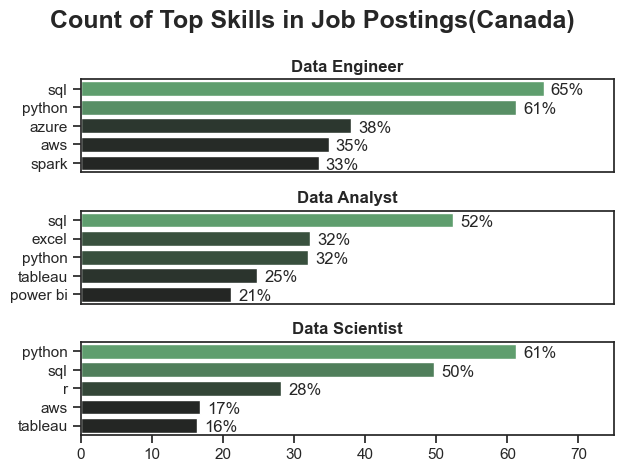

In [178]:
df_merged
fig , ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style= 'ticks')

for i , title in enumerate(job_titles):
    df_plot = df_merged[df_merged['job_title_short'] == title].head(5)
    # df_plot.plot(kind = 'barh', x = 'job_skills', y = 'value counts', ax = ax[i], title = title, legend = False)
    sns.barplot(data= df_plot, x = 'skills %', y = 'job_skills', ax = ax[i], hue = 'value counts', palette= 'dark:g', legend= False)
    # ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].set_title(title, fontweight = 'bold')
    ax[i].set_xlim(0, 75)
    
    
    for n , v in enumerate(df_plot['skills %']):
        ax[i].text(v+1, n + 0.1, f'{v:.0f}%', va ='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

    
    
fig.suptitle(f'Count of Top Skills in Job Postings({country})', fontweight ='bold', fontsize = 18)
fig.tight_layout()
